# Mining Indeed
In this notebook, we explore the possibilities around common terms and phrases found related to "Data Scientist" job listings.  You might think to use this to get a sense of your job market to help you tailor your resume or find regional differences in key terms.

In [2]:
import sqlite3 as db, re, sys
import pandas as pd, matplotlib, seaborn, collections
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

%matplotlib inline

seaborn.set_style('darkgrid')
# sys.setdefaultencoding("utf-8")

In [36]:
conn =  db.connect('/Users/davidyerrington/virtualenvs/data/livecoding.tv/job_scraper/jobs.db')
sql  =  """
SELECT * FROM jobs
GROUP BY url
"""

jobs_df = pd.read_sql(sql, con=conn)
conn.close()

In [37]:
jobs_df.content_text = jobs_df.content_text.map(lambda text: re.sub("[^a-zA-Z0-9 ]+", "", text.lower()))

## Top 10 Companies Hiring

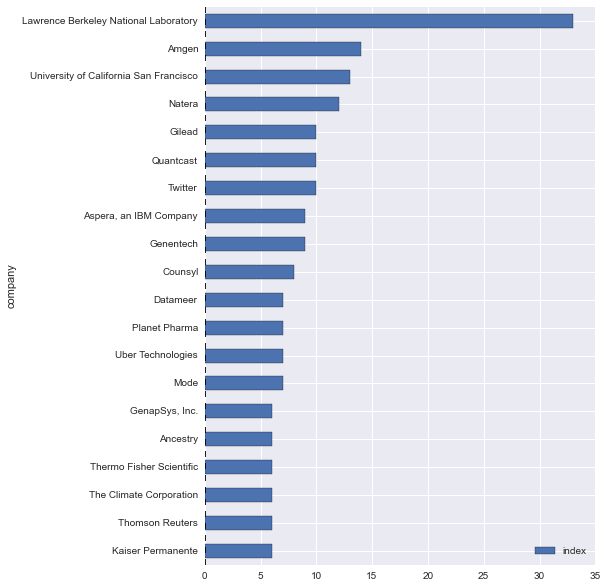

In [38]:
company_df = jobs_df.groupby(['company']).count().sort('index', ascending=False).head(20)
pd.DataFrame(company_df['index']).sort('index').plot(kind='barh', figsize=(7,10))

In [39]:
from nltk.util import ngrams
sentence = 'goodread is the only read this side of the mississippi for always and forever'
n = 5
sixgrams = ngrams(sentence.split(), n)
for grams in sixgrams:
  print grams


def nltk_ngram(text):
    from nltk.util import ngrams
    n = 5
    sixgrams = ngrams(text.split(), n)
    
    ngram_list = []
    
    for grams in sixgrams:
        ngram_list.append(" ".join(grams))
        
    return ngram_list


('goodread', 'is', 'the', 'only', 'read')
('is', 'the', 'only', 'read', 'this')
('the', 'only', 'read', 'this', 'side')
('only', 'read', 'this', 'side', 'of')
('read', 'this', 'side', 'of', 'the')
('this', 'side', 'of', 'the', 'mississippi')
('side', 'of', 'the', 'mississippi', 'for')
('of', 'the', 'mississippi', 'for', 'always')
('the', 'mississippi', 'for', 'always', 'and')
('mississippi', 'for', 'always', 'and', 'forever')


In [40]:
N = 3
strparts = sentence.split(' ')

collections.Counter(tuple(strparts[i:i+N]) for i in xrange(len(strparts)-N))

Counter({('for', 'always', 'and'): 1, ('mississippi', 'for', 'always'): 1, ('this', 'side', 'of'): 1, ('read', 'this', 'side'): 1, ('only', 'read', 'this'): 1, ('of', 'the', 'mississippi'): 1, ('is', 'the', 'only'): 1, ('side', 'of', 'the'): 1, ('the', 'mississippi', 'for'): 1, ('goodread', 'is', 'the'): 1, ('the', 'only', 'read'): 1})

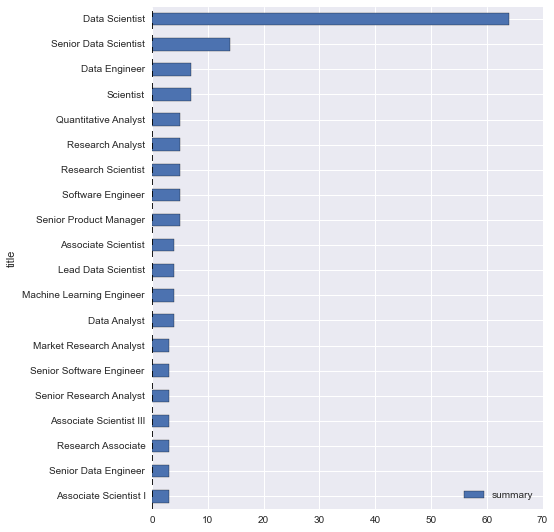

In [41]:
# jobs_df.groupby('title')['title'].head(800)

# jobs_df.columns
jobs_df[['title', 'summary']].groupby('title').count().sort('summary').tail(20).plot(kind='barh', figsize=(7,9))

In [42]:
summaries  = ''

for summary in jobs_df['summary'].values:
    summaries += summary

In [43]:
content_text  = ''

pd.Grouper?

for text in jobs_df['content_text'].values:
    content_text += text

In [44]:
# content_text.find('men')
content_ngrams = nltk_ngram(content_text)

In [45]:
count = 0

for text in jobs_df.content_text.values:
    if text.find('mad men in') > 0:
        print text.find(u'Mad Men in')
        count += 1
        
print count

0


In [46]:
import itertools

bow_content = []

for text in jobs_df.content_text.values:
    bow_content.append(text.rstrip('\r\n').split(' '))
    
bow_content = list(itertools.chain(*bow_content))

print bow_content[0]

from nltk.corpus import stopwords
stops = stopwords.words('english')
stops.append(' ')
normalized = [w for w in bow_content if w.lower() not in stops]


systems


In [47]:
vect = TfidfVectorizer(ngram_range=(2,2))

vect.build_preprocessor()(summaries)
vect.build_tokenizer()(summaries)
ngrams_summaries = vect.build_analyzer()(summaries)

In [48]:
vect = TfidfVectorizer(ngram_range=(6,6))

vect.build_preprocessor()(content_text)
vect.build_tokenizer()(content_text)
ngrams_text = vect.build_analyzer()(content_text)

In [56]:
# bow_content
def ngrams(words, k):   
    return zip(*[words[i:] for i in range(k)])

blacklist    =  [u'and', u'to', u'the', u'of', u'a', u'be', u'an', u'in', u'with', u'for', u'or', u'as', u'you', u'it', '', 'race', 'religion', 'color', 'naval', 'sexual', 'orientation', 'gender', 'identity']
bow_content  =  [word for word in bow_content if word not in blacklist]

text_grams   =  ngrams(bow_content, 3)

len(text_grams)
num_grams = Counter(text_grams)
num_bow   = Counter(bow_content)
bow_df    = pd.DataFrame(bow_content, columns=['word'])

In [66]:
bow_df['count'] = 0

## Which words are "frequently" found in data scientist job posts in San Francisco CA?

Looks like Python, SQL, Stats, Hadoop are very common terms.  If you where looking for a job, you might consider playing up this experience in your resume and/or cover letter.

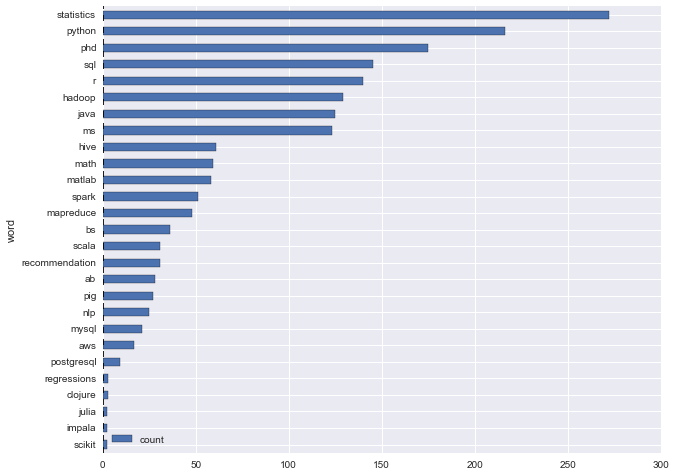

In [86]:
terms = ['python', 'gensim', 'bayes', 'scikit', 'nlp', 'r', 'sql', 'hadoop', 'spark', 'hive', 'aws', 'postgresql', 'mysql', 'phd', 'bs', 'ms', 'nltk', 'statistics', 'math', 'java', 'scala', 'clojure', 'julia', 'matlab', 'mllib', 'pig', 'impala', 'big data', 'mapreduce', 'recommendation', 'regressions', 'ab']
bow_df[bow_df['word'].isin(terms)].groupby('word').count().sort('count').plot(kind='barh', figsize=(10,8))

## Raw term frequencies - 40 most common

In [118]:
Counter(bow_content).most_common(40)

[(u'data', 3367),
 (u'is', 3036),
 (u'our', 2183),
 (u'experience', 1868),
 (u'on', 1848),
 (u'this', 1777),
 (u'are', 1729),
 (u'will', 1699),
 (u'work', 1615),
 (u'job', 1474),
 (u'we', 1470),
 (u'that', 1446),
 (u'your', 1380),
 (u'at', 1304),
 (u'team', 1230),
 (u'all', 1149),
 (u'by', 1075),
 (u'research', 1049),
 (u'development', 1036),
 (u'have', 986),
 (u'us', 900),
 (u'business', 848),
 (u'from', 846),
 (u'other', 839),
 (u'product', 815),
 (u'san', 814),
 (u'new', 798),
 (u'francisco', 754),
 (u'skills', 750),
 (u'not', 740),
 (u'science', 727),
 (u'years', 718),
 (u'analysis', 713),
 (u'software', 696),
 (u'clinical', 680),
 (u'information', 675),
 (u'about', 670),
 (u'more', 647),
 (u'company', 642),
 (u'ability', 640)]

In [90]:
counts_summary_df = pd.DataFrame(Counter(ngrams_summaries), index=['count']).T

In [88]:
Counter(text_grams).most_common(20)
# counts_text_df = pd.DataFrame(Counter(ngrams_text), index=['count']).T

[((u'all', u'rights', u'reserved'), 154),
 ((u'after', u'0', u'minutes'), 122),
 ((u'service', u'is', u'set'), 122),
 ((u'instructions', u'before', u'applying'), 116),
 ((u'application', u'instructions', u'before'), 116),
 ((u'all', u'application', u'instructions'), 116),
 ((u'now', u'please', u'review'), 116),
 ((u'review', u'all', u'application'), 116),
 ((u'please', u'review', u'all'), 116),
 ((u'apply', u'now', u'please'), 116),
 ((u'san', u'francisco', u'ca'), 104),
 ((u'equal', u'opportunity', u'employer'), 102),
 ((u'is', u'equal', u'opportunity'), 94),
 ((u'employment', u'without', u'regard'), 81),
 ((u'protected', u'veteran', u'status'), 80),
 ((u'military', u'ground', u'air'), 80),
 ((u'us', u'military', u'ground'), 80),
 ((u'inc', u'all', u'rights'), 76),
 ((u'without', u'regard', u'sex'), 75),
 ((u'drop', u'files', u'here'), 74)]

In [91]:
counts_summary_df[counts_df['count'] > 5].sort('count', ascending=False).head(20).sort('count').plot(kind='barh', figsize=(7,9))

NameError: name 'counts_df' is not defined

###Find ngrams > 5

In [87]:
counts_text_df[counts_text_df['count'] > 5].sort('count', ascending=False).head(20).sort('count').plot(kind='barh', figsize=(7,8))

NameError: name 'counts_text_df' is not defined

## What is this!?

This is a digression we had on the stream related to a job interview quesiton:  "Count the number of occurances of the number '2', in every number from 1-N -- THE FASTEST WAY POSSIBLE!". 

This is a little out of context, but I wanted to at least keep this somewhere ;)

In [166]:
import timeit
from collections import deque

In [25]:
def count_2s(N):

    count = 0
 

    for num in xrange(1, N+1):

        count += list(str(num)).count(2)

    return count

In [26]:
def deque_n(n):

    nums = deque()

    while True:

        n, remainder = divmod(n, 10) # base 10 conv to digits = faster than str()
        nums.appendleft(remainder)
        
        if n == 0:
            break
    
    return list(nums)

def faster_count_d(N, d=2):

    count = 0

    for num in xrange(1, N + 1): # buffer in-memory xrange

        num_list = map(int, str(num))
        count += num_list.count(d)

    return count

In [27]:
%timeit count_2s(200000)  # 44

1 loops, best of 3: 563 ms per loop


In [28]:
%timeit faster_count_d(200000)

1 loops, best of 3: 2.54 s per loop


In [198]:
num = 255
numlist = [num >i & 1 for i in range(8)]
print numlist

[True, True, True, True, True, True, True, True]


In [149]:
%timeit for x in range(100): _

100000 loops, best of 3: 5.03 µs per loop


## This solution, provided by brandonbahret, is actually the fastest solution compared to list(str()) to create a numerical list from a number.

In [94]:
def brandons_list(num):

    numlst = []
    
    while(num):
        numlst  += [num%10]
        num    /=  10
        
    return numlst

In [15]:
brandons_list(123456789)

[9, 8, 7, 6, 5, 4, 3, 2, 1]

In [95]:


def faster_count(N, d=2):

#     get_num_list = lambda num: [int(i) for i in str(num)]
    #countInNumber = lambda num, count: len([i for i in str(num) if int(i)==count]) #counts the occurrence of a number in a number
    count = 0

    for num in xrange(1, N + 1): # buffer in-memory xrange

         
#         num_list = brandons_list(num)
#         num_list = get_num_list(num)
#         count += num_list.count(d)
#         count += countInNumber(num, 2)

    return count

In [96]:
%timeit faster_count(2000000, d=2)

1 loops, best of 3: 14.2 s per loop


In [46]:

countInNumber(22234444422, 2)

5

In [36]:
numlst(222223333222).count(2)

8

In [117]:
def supercount():
    
    numbers = [list(str(num)) for num in list(xrange(1, 200000+1))]
    counts_df = pd.DataFrame(numbers)
    
    counts = 0

    for i in counts_df.columns:
        counts += counts_df[counts_df[i] == '2'][i].count()

    return counts



In [84]:
%timeit supercount()

1 loops, best of 3: 981 ms per loop


In [116]:
def countInNumber(num,count):
    
    total = 0
    
    while(num):
        total += num %10 == count
        # num /= 10
        num *= 0
    return total

In [87]:
countInNumber(200020, 2)

2

In [115]:
num = 200000

total = 0
total += num % 10 == total
print total

num /= 10

## iteration 2
total += num % 10 == total
print total
num *= 0.1
print num

## iteration 3
total += num * .1 == total
print total
num *= 0.1
print num

## iteration 4
total += num % 10 == total
print total
num *= 0.1
print num

## iteration 5
total += num % 10 == total
print total
num *= 0.1
print num


## iteration 6
total += num % 10 == total
print total
num *= 0.1
print num

1
1
2000.0
1
200.0
1
20.0
1
2.0
1
0.2


In [13]:
grams_df = pd.read_csv('../data/count_2w.txt', delimiter="\t", names=['bigram', 'count'])
# grams_df
# pd.read_csv?

In [23]:
grams_df.sort('count', ascending=False).head(150)

,bigram,count
185314,of the,2766332391
145856,in the,1628795324
262184,to the,1139248999
188095,on the,800328815
124584,for the,692874802
65688,and the,629726893
258886,to be,505148997
150205,is a,476718990
280780,with the,461331348
127430,from the,428303219
